In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
# add scoring to raw data
rawdata = pd.read_csv(r"csv/raw+walk.csv")

# remove NaN values from walk_score
rawdata = rawdata.dropna(how='any')

# convert walk_score from float64 to int64
rawdata['walk_score'] = rawdata['walk_score'].astype(np.int64, errors = "ignore")

rawdata.head()
rawdata.dtypes

FID              int64
OBJECTID         int64
GEOID            int64
artent_csv       int64
banks_csv_       int64
eats_csv_c       int64
foodmkts_c       int64
libraries_       int64
medical_cs       int64
parks_csv_       int64
pharmacy_c       int64
postoff_cs       int64
salon_csv_       int64
boro_name       object
ntaname         object
GEO_ID          object
ALAND            int64
AWATER           int64
area           float64
Tot_Pop          int64
Pop_65Over       int64
Perc_65Over      int64
walk_score       int64
dtype: object

In [4]:
# find walkscore data by census tract and join it with rawdata. Name the column "walk_score"
rawdata['walk_score_pct'] = rawdata['walk_score']/100

rawdata.head()

,FID,OBJECTID,GEOID,artent_csv,banks_csv_,eats_csv_c,foodmkts_c,libraries_,medical_cs,parks_csv_,...,ntaname,GEO_ID,ALAND,AWATER,area,Tot_Pop,Pop_65Over,Perc_65Over,walk_score,walk_score_pct
0,2021,2022,36005000100,0,0,0,0,0,0,0,...,Rikers Island,1400000US36005000100,1677210,1035011,1.047194,7080,51,1,4,0.04
1,1105,1106,36005033400,0,0,0,0,0,0,2,...,park-cemetery-etc-Bronx,1400000US36005033400,3044513,62113,1.199475,72,14,19,35,0.35
2,1473,1474,36047033600,0,0,0,0,0,0,0,...,Seagate-Coney Island,1400000US36047033600,688235,1085724,0.684929,4479,736,16,39,0.39
3,94,95,36085017007,0,0,0,0,0,0,1,...,Arden Heights,1400000US36085017007,1460404,1188,0.564324,5561,461,8,41,0.41
4,95,96,36085017008,0,0,0,0,0,0,0,...,Arden Heights,1400000US36085017008,1036915,0,0.400355,7608,1418,19,41,0.41


In [6]:
# sum up # of facilities for fac_score
rawdata['fac_count'] = rawdata[['artent_csv','banks_csv_','eats_csv_c','foodmkts_c','libraries_','medical_cs','parks_csv_','pharmacy_c','postoff_cs','salon_csv_']].sum(axis=1)

# convert total area to sqmi
rawdata['totalarea_sqmi'] = (rawdata['ALAND'] + rawdata['AWATER']) / 2589988 

# get fac_score by weighting fac_count according to totalarea_sqmi
rawdata['fac_score'] = rawdata['fac_count'] / rawdata['totalarea_sqmi']

rawdata.head(200)

,FID,OBJECTID,GEOID,artent_csv,banks_csv_,eats_csv_c,foodmkts_c,libraries_,medical_cs,parks_csv_,...,AWATER,area,Tot_Pop,Pop_65Over,Perc_65Over,walk_score,walk_score_pct,fac_count,totalarea_sqmi,fac_score
0,2021,2022,36005000100,0,0,0,0,0,0,0,...,1035011,1.047194,7080,51,1,4,0.04,0,1.047194,0.000000
1,1105,1106,36005033400,0,0,0,0,0,0,2,...,62113,1.199475,72,14,19,35,0.35,2,1.199475,1.667396
2,1473,1474,36047033600,0,0,0,0,0,0,0,...,1085724,0.684929,4479,736,16,39,0.39,0,0.684929,0.000000
3,94,95,36085017007,0,0,0,0,0,0,1,...,1188,0.564324,5561,461,8,41,0.41,1,0.564324,1.772032
4,95,96,36085017008,0,0,0,0,0,0,0,...,0,0.400355,7608,1418,19,41,0.41,0,0.400355,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,539,540,36081059800,0,0,0,0,0,0,1,...,0,0.079719,1731,274,16,74,0.74,1,0.079719,12.544076
196,541,542,36081059400,0,0,0,0,0,0,0,...,0,0.085732,1835,428,23,74,0.74,0,0.085732,0.000000
197,544,545,36081060800,0,0,0,0,1,0,0,...,0,0.081640,1740,341,20,74,0.74,1,0.081640,12.248934
198,545,546,36081060000,0,0,0,0,0,0,0,...,0,0.068231,1140,264,23,74,0.74,0,0.068231,0.000000


In [7]:
# normalize fac_score between 0-1
rawdata['fac_score_pct'] = (rawdata['fac_score'] - min(rawdata['fac_score'])) / (max(rawdata['fac_score']) - min(rawdata['fac_score']))
rawdata['fac_score_pct'].describe()

count    2034.000000
mean        0.054852
std         0.108538
min         0.000000
25%         0.000000
50%         0.012862
75%         0.050220
max         1.000000
Name: fac_score_pct, dtype: float64

In [8]:
# add eq_score as the mean of fac_score_pct & walk_score_pct'
rawdata['eq_score'] = (rawdata['fac_score_pct'] + rawdata['walk_score_pct']) / 2

rawdata.head(200)
rawdata['eq_score'].describe()

count    2034.000000
mean        0.464311
std         0.089473
min         0.020000
25%         0.420000
50%         0.462975
75%         0.495000
max         1.000000
Name: eq_score, dtype: float64

count    2034.000000
mean        0.464311
std         0.089473
min         0.020000
25%         0.420000
50%         0.462975
75%         0.495000
max         1.000000
Name: eq_score, dtype: float64

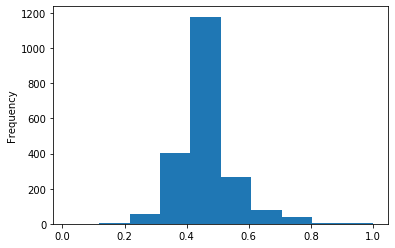

In [9]:
display(rawdata['eq_score'].plot.hist())
display(rawdata['eq_score'].describe())

In [17]:
rawdata['fac_score_scale'] = rawdata['fac_score_pct'] * 10
rawdata['walk_score_scale'] = rawdata['walk_score_pct'] * 10
rawdata['eq_score_scale'] = rawdata['eq_score'] * 10
rawdata.head()

,FID,OBJECTID,GEOID,artent_csv,banks_csv_,eats_csv_c,foodmkts_c,libraries_,medical_cs,parks_csv_,...,walk_score,walk_score_pct,fac_count,totalarea_sqmi,fac_score,fac_score_pct,eq_score,fac_score_scale,walk_score_scale,eq_score_scale
0,2021,2022,36005000100,0,0,0,0,0,0,0,...,4,0.04,0,1.047194,0.000000,0.000000,0.020000,0.000000,0.4,0.200000
1,1105,1106,36005033400,0,0,0,0,0,0,2,...,35,0.35,2,1.199475,1.667396,0.001423,0.175711,0.014229,3.5,1.757115
2,1473,1474,36047033600,0,0,0,0,0,0,0,...,39,0.39,0,0.684929,0.000000,0.000000,0.195000,0.000000,3.9,1.950000
3,94,95,36085017007,0,0,0,0,0,0,1,...,41,0.41,1,0.564324,1.772032,0.001512,0.205756,0.015122,4.1,2.057561
4,95,96,36085017008,0,0,0,0,0,0,0,...,41,0.41,0,0.400355,0.000000,0.000000,0.205000,0.000000,4.1,2.050000


In [18]:
# export as csv. includes 
##  neighborhood name (ntaname)
##  borough name (boro_name)
##  amenities count by type
##  facilities score (fac_score)
##  walk score (walk_score)
##  final equitability score (eq_score)
##  percentage of seniors over 65 (Perc_65Over)

rawdata.to_csv(r"csv/final_data_scored.csv", index = False)